In [95]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

In [2]:
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

## Creating data to view and fit

In [3]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
# Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

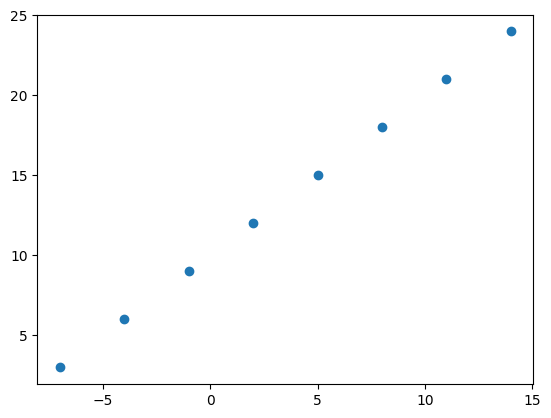

In [4]:
# Visualize
plt.scatter(X, Y)

In [5]:
input_shape = X.shape
output_shape = Y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
# Turn numpy arrays into tensors
X = tf.constant(X)
Y = tf.constant(Y)
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modeling with tensorflow

1. Creating a model: Define input and output laters as well as the hidden layers
2. Compiling a model: Define loss function,  optimizer (how to improve the learning) and evaluation metrics.
3. Fitting a model: Find the patterns.

In [7]:
# Set random seed
tf.random.set_seed(42)

In [8]:
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])
# Compile the model
model.compile(loss=tf.keras.losses.mae,      # MAE: Mean absolote error
             optimizer=tf.keras.optimizers.SGD(), # SGD: Stochastic gradient descent
             metrics=['mae'])  
# Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5)

Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 21.6075 - mae: 21.6075
Epoch 2/5
1/1 [==============================] - 0s 56ms/step - loss: 21.2144 - mae: 21.2144
Epoch 3/5
1/1 [==============================] - 0s 16ms/step - loss: 20.8213 - mae: 20.8213
Epoch 4/5
1/1 [==============================] - 0s 16ms/step - loss: 20.4547 - mae: 20.4547
Epoch 5/5
1/1 [==============================] - 0s 16ms/step - loss: 20.1734 - mae: 20.1734


In [9]:
# Check prediction
model.predict([17.0])

1/1 [==============================] - 0s 398ms/step


array([[-23.169958]], dtype=float32)

## Improve the model

1. Create a model: Add more layers, increase the number of hidden units (neurons) within layers, change activation function of each layer.
2. Compile the model: Change optimization, change the learning rate of optimization function.
3. Fit the model: Change epochs (look at the data more times). Feed more data to train.

In [10]:
# Rebuild the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])
# Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=['mae'])  
# Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 18.1082 - mae: 18.1082
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 17.8270 - mae: 17.8270
Epoch 3/100
1/1 [==============================] - 0s 24ms/step - loss: 17.5457 - mae: 17.5457
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 17.2645 - mae: 17.2645
Epoch 5/100
1/1 [==============================] - 0s 24ms/step - loss: 16.9832 - mae: 16.9832
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 16.7020 - mae: 16.7020
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 16.4207 - mae: 16.4207
Epoch 8/100
1/1 [==============================] - 0s 24ms/step - loss: 16.1395 - mae: 16.1395
Epoch 9/100
1/1 [==============================] - 0s 20ms/step - loss: 15.8582 - mae: 15.8582
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 15.5770 - mae: 15.5770
Epoch 11/100
1/1 [==============================] -

1/1 [==============================] - 0s 16ms/step - loss: 6.9056 - mae: 6.9056
Epoch 88/100
1/1 [==============================] - 0s 24ms/step - loss: 6.9000 - mae: 6.9000
Epoch 89/100
1/1 [==============================] - 0s 24ms/step - loss: 6.8944 - mae: 6.8944
Epoch 90/100
1/1 [==============================] - 0s 16ms/step - loss: 6.8888 - mae: 6.8888
Epoch 91/100
1/1 [==============================] - 0s 16ms/step - loss: 6.8831 - mae: 6.8831
Epoch 92/100
1/1 [==============================] - 0s 16ms/step - loss: 6.8775 - mae: 6.8775
Epoch 93/100
1/1 [==============================] - 0s 12ms/step - loss: 6.8719 - mae: 6.8719
Epoch 94/100
1/1 [==============================] - 0s 16ms/step - loss: 6.8663 - mae: 6.8663
Epoch 95/100
1/1 [==============================] - 0s 20ms/step - loss: 6.8606 - mae: 6.8606
Epoch 96/100
1/1 [==============================] - 0s 20ms/step - loss: 6.8550 - mae: 6.8550
Epoch 97/100
1/1 [==============================] - 0s 16ms/step - loss: 

In [11]:
model.predict([17.0])

1/1 [==============================] - 0s 200ms/step


array([[29.362116]], dtype=float32)

In [12]:
# Trying another change: Extra layer with 100 hidden units
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])
# Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics=['mae'])  
# Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 12.2056 - mae: 12.2056
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 11.4161 - mae: 11.4161
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 10.6208 - mae: 10.6208
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 9.8185 - mae: 9.8185
Epoch 5/100
1/1 [==============================] - 0s 20ms/step - loss: 9.0078 - mae: 9.0078
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 8.1872 - mae: 8.1872
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 7.3549 - mae: 7.3549
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 6.9040 - mae: 6.9040
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 7.1697 - mae: 7.1697
Epoch 10/100
1/1 [==============================] - 0s 20ms/step - loss: 7.4573 - mae: 7.4573
Epoch 11/100
1/1 [==============================] - 0s 20ms/step 

1/1 [==============================] - 0s 16ms/step - loss: 0.5421 - mae: 0.5421
Epoch 89/100
1/1 [==============================] - 0s 16ms/step - loss: 0.3156 - mae: 0.3156
Epoch 90/100
1/1 [==============================] - 0s 12ms/step - loss: 0.3113 - mae: 0.3113
Epoch 91/100
1/1 [==============================] - 0s 16ms/step - loss: 0.4244 - mae: 0.4244
Epoch 92/100
1/1 [==============================] - 0s 16ms/step - loss: 0.2526 - mae: 0.2526
Epoch 93/100
1/1 [==============================] - 0s 16ms/step - loss: 0.2183 - mae: 0.2183
Epoch 94/100
1/1 [==============================] - 0s 16ms/step - loss: 0.3225 - mae: 0.3225
Epoch 95/100
1/1 [==============================] - 0s 16ms/step - loss: 0.2173 - mae: 0.2173
Epoch 96/100
1/1 [==============================] - 0s 12ms/step - loss: 0.2740 - mae: 0.2740
Epoch 97/100
1/1 [==============================] - 0s 16ms/step - loss: 0.2993 - mae: 0.2993
Epoch 98/100
1/1 [==============================] - 0s 12ms/step - loss: 

In [13]:
# Might be overfitting, since the metrics is better, but the predicion deviates more than the previous test 
model.predict([17.0])

1/1 [==============================] - 0s 260ms/step


array([[27.924963]], dtype=float32)

## Evaluating a model

"Visualize, visualize, visualize"

In [14]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [15]:
# Make labels
Y = X + 10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

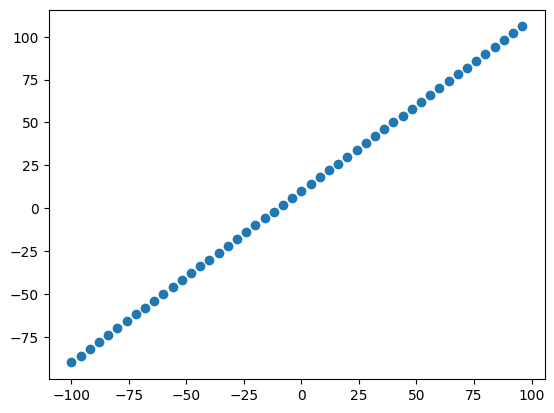

In [16]:
# Visualize the data
plt.scatter(X, Y)

In [17]:
# Split the data in train/test
X_train = X[:40]
Y_train = Y[:40]
X_test = X[40:]
Y_test = Y[40:]

len(X_train), len(X_test), len(Y_train), len(Y_test)

(40, 10, 40, 10)

## Visualizing the data

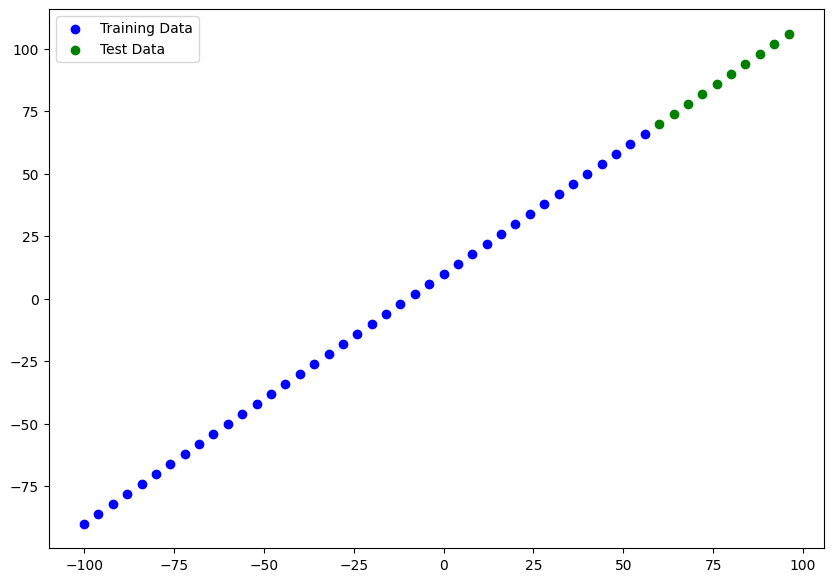

In [18]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, Y_train, c='b', label='Training Data')
plt.scatter(X_test, Y_test, c='g', label='Test Data')
plt.legend()
plt.show()

In [19]:
# Neural network for our data
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='Input_Layer'),
    tf.keras.layers.Dense(1, name='Output_Layer'),
], name='model_1')
# Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
             metrics=['mae'])  
# Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 2s 16ms/step - loss: 31.8001 - mae: 31.8001
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 25.5592 - mae: 25.5592
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 19.7263 - mae: 19.7263
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 14.1095 - mae: 14.1095
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 9.3986 - mae: 9.3986
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 8.3605 - mae: 8.3605
Epoch 7/100
2/2 [==============================] - 0s 12ms/step - loss: 10.0508 - mae: 10.0508
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 10.8672 - mae: 10.8672
Epoch 9/100
2/2 [==============================] - 0s 0s/step - loss: 10.7918 - mae: 10.7918
Epoch 10/100
2/2 [==============================] - 0s 16ms/step - loss: 10.2375 - mae: 10.2375
Epoch 11/100
2/2 [==============================] - 0s 0

2/2 [==============================] - 0s 0s/step - loss: 0.1978 - mae: 0.1978
Epoch 89/100
2/2 [==============================] - 0s 16ms/step - loss: 0.1635 - mae: 0.1635
Epoch 90/100
2/2 [==============================] - 0s 16ms/step - loss: 0.2827 - mae: 0.2827
Epoch 91/100
2/2 [==============================] - 0s 16ms/step - loss: 0.2778 - mae: 0.2778
Epoch 92/100
2/2 [==============================] - 0s 16ms/step - loss: 0.1376 - mae: 0.1376
Epoch 93/100
2/2 [==============================] - 0s 16ms/step - loss: 0.3182 - mae: 0.3182
Epoch 94/100
2/2 [==============================] - 0s 16ms/step - loss: 0.8122 - mae: 0.8122
Epoch 95/100
2/2 [==============================] - 0s 16ms/step - loss: 1.0336 - mae: 1.0336
Epoch 96/100
2/2 [==============================] - 0s 16ms/step - loss: 0.9384 - mae: 0.9384
Epoch 97/100
2/2 [==============================] - 0s 16ms/step - loss: 1.4913 - mae: 1.4913
Epoch 98/100
2/2 [==============================] - 0s 16ms/step - loss: 1.

In [20]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 10)                20        
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


**- Dense layer: Fully connected layers, ie all neurons from each layer connect to all neurons on the next.**  
**- Non-trainable params: When getting a pre-trained model sometimes we may want to "freeze" some parameters.**

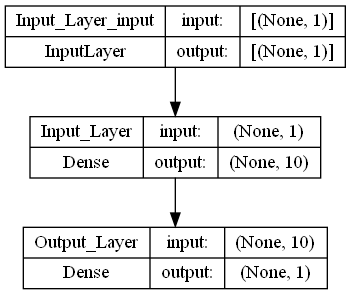

In [21]:
plot_model(model, show_shapes=True, show_layer_names=True)

## Visualizing predictions

In [22]:
# Make some predictions
Y_pred = model.predict(X_test)
Y_pred

1/1 [==============================] - 0s 192ms/step


array([[ 68.368355],
       [ 72.269196],
       [ 76.17004 ],
       [ 80.070885],
       [ 83.971725],
       [ 87.87258 ],
       [ 91.77342 ],
       [ 95.67426 ],
       [ 99.57511 ],
       [103.47596 ]], dtype=float32)

In [23]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [24]:
# Plotting function
def plot_predictions(train_data=X_train, train_labels=Y_train, test_data=X_test, test_labels=Y_test, predictions=Y_pred):
    """
    Plots training data, test data and compare predictions to ground truth labels
    """
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c='b', label='Training Data')
    plt.scatter(test_data, test_labels, c='g', label='Test Data')
    
    # Plot model's predictions
    plt.scatter(test_data, predictions, c='r', label='Prediction')
    # Show legend
    plt.legend()
    plt.show()

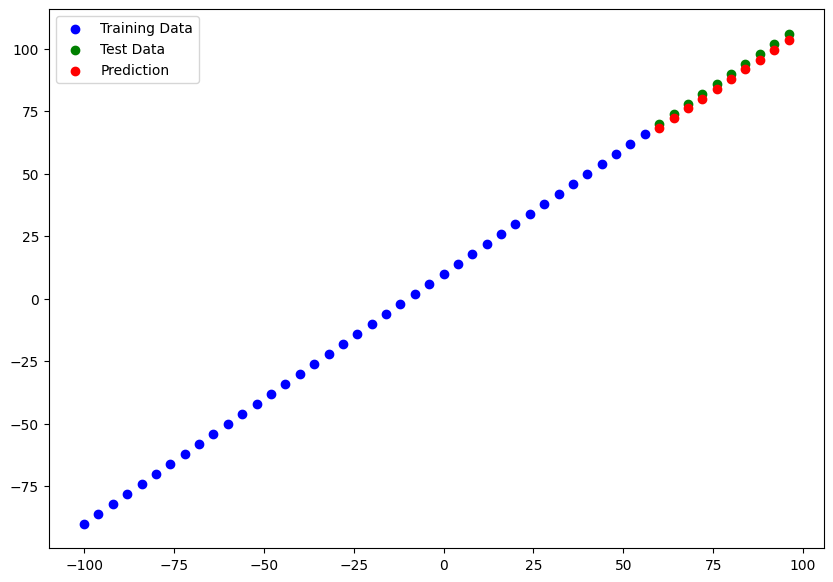

In [25]:
plot_predictions()

## Evaluating the model

In [26]:
# Evaluate the model on the test
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 448ms/step - loss: 2.0778 - mae: 2.0778


[2.0778441429138184, 2.0778441429138184]

In [27]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(Y_test, tf.squeeze(Y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.0778465>

In [28]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(Y_test, tf.squeeze(Y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=4.398557>

In [29]:
# Make some functions for mse and mae
def mae(Y_true, Y_pred):
    return tf.metrics.mean_absolute_error(y_true=Y_true, y_pred=tf.squeeze(Y_pred))

def mse(Y_true, Y_pred):
    return tf.metrics.mean_squared_error(y_true=Y_true, y_pred=tf.squeeze(Y_pred))

## Experiments to improve the model

In [30]:
X_train, Y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56])>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66])>)

**Modeling experiments:**
- Same original model, 1 layer, 100 epochs
- 2 layers, 100 epochs
- 2 layers, 500 epochs

In [31]:
# Setting the seed
tf.random.set_seed(42)

In [32]:
# Model 1
# Definition
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# Compile
model_1.compile(loss=tf.keras.losses.mae, 
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])
# Fit
model_1.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 20ms/step - loss: 46.4037 - mae: 46.4037
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 15.3319 - mae: 15.3319
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 14.5923 - mae: 14.5923
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 7.8820 - mae: 7.8820
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 10.3269 - mae: 10.3269
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.5720 - mae: 9.5720
Epoch 7/100
2/2 [==============================] - 0s 12ms/step - loss: 8.6902 - mae: 8.6902
Epoch 8/100
2/2 [==============================] - 0s 12ms/step - loss: 9.0642 - mae: 9.0642
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 19.0324 - mae: 19.0324
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 10.2777 - mae: 10.2777
Epoch 11/100
2/2 [==============================] - 0s 12ms

2/2 [==============================] - 0s 12ms/step - loss: 11.7053 - mae: 11.7053
Epoch 88/100
2/2 [==============================] - 0s 12ms/step - loss: 10.3065 - mae: 10.3065
Epoch 89/100
2/2 [==============================] - 0s 12ms/step - loss: 6.7557 - mae: 6.7557
Epoch 90/100
2/2 [==============================] - 0s 12ms/step - loss: 8.1328 - mae: 8.1328
Epoch 91/100
2/2 [==============================] - 0s 12ms/step - loss: 6.9044 - mae: 6.9044
Epoch 92/100
2/2 [==============================] - 0s 8ms/step - loss: 9.0055 - mae: 9.0055
Epoch 93/100
2/2 [==============================] - 0s 12ms/step - loss: 7.4970 - mae: 7.4970
Epoch 94/100
2/2 [==============================] - 0s 12ms/step - loss: 9.1154 - mae: 9.1154
Epoch 95/100
2/2 [==============================] - 0s 12ms/step - loss: 10.5739 - mae: 10.5739
Epoch 96/100
2/2 [==============================] - 0s 12ms/step - loss: 10.5958 - mae: 10.5958
Epoch 97/100
2/2 [==============================] - 0s 12ms/step -

1/1 [==============================] - 0s 120ms/step


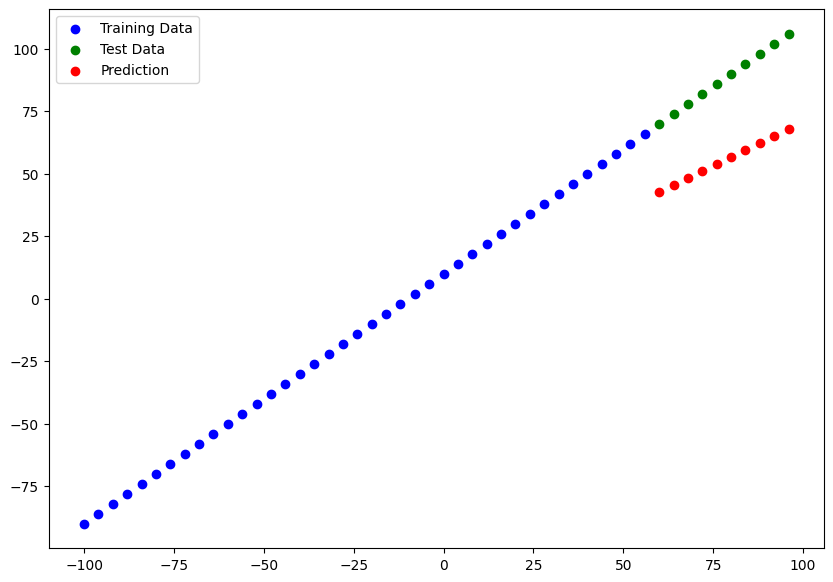

In [33]:
Y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=Y_preds_1)

In [34]:
# Calculate model 1 evaluation metrics
mae_1 = mae(Y_test, Y_preds_1)
mse_1 = mse(Y_test, Y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=32.679874>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1080.4482>)

In [35]:
tf.random.set_seed(42)

In [36]:
# Model 2 (just to experiment, the metrics on compile will be mse instead of mae)
# Definition
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# Compile
model_2.compile(loss=tf.keras.losses.mae, 
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mse'])
# Fit
model_2.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 20ms/step - loss: 55.5506 - mse: 4766.8135
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 29.1578 - mse: 1339.8518
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 20.0296 - mse: 586.1663
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 12.9692 - mse: 226.8113
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 14.2945 - mse: 251.0221
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 11.4353 - mse: 148.2681
Epoch 7/100
2/2 [==============================] - 0s 12ms/step - loss: 12.4765 - mse: 204.1310
Epoch 8/100
2/2 [==============================] - 0s 12ms/step - loss: 10.9976 - mse: 144.6021
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 39.0651 - mse: 2379.4414
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 26.6371 - mse: 997.5132
Epoch 11/100
2/2 [===================

2/2 [==============================] - 0s 12ms/step - loss: 20.2259 - mse: 571.8255
Epoch 86/100
2/2 [==============================] - 0s 12ms/step - loss: 10.1740 - mse: 115.3053
Epoch 87/100
2/2 [==============================] - 0s 12ms/step - loss: 24.2514 - mse: 822.5811
Epoch 88/100
2/2 [==============================] - 0s 8ms/step - loss: 18.9185 - mse: 508.5892
Epoch 89/100
2/2 [==============================] - 0s 8ms/step - loss: 7.6862 - mse: 84.2016
Epoch 90/100
2/2 [==============================] - 0s 12ms/step - loss: 17.3339 - mse: 430.6845
Epoch 91/100
2/2 [==============================] - 0s 12ms/step - loss: 12.4457 - mse: 226.4998
Epoch 92/100
2/2 [==============================] - 0s 12ms/step - loss: 24.8112 - mse: 897.9761
Epoch 93/100
2/2 [==============================] - 0s 12ms/step - loss: 15.4562 - mse: 364.7729
Epoch 94/100
2/2 [==============================] - 0s 12ms/step - loss: 9.7503 - mse: 120.4305
Epoch 95/100
2/2 [==============================

1/1 [==============================] - 0s 144ms/step


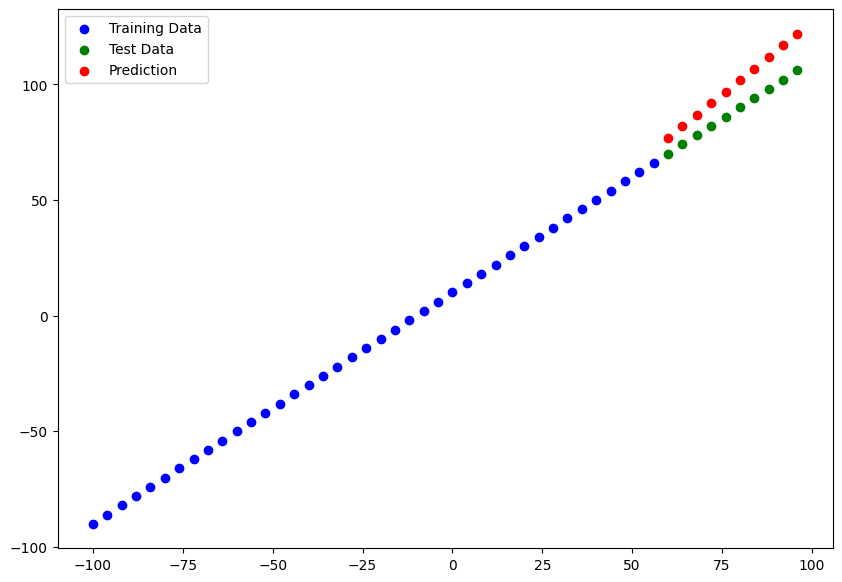

In [37]:
Y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=Y_preds_2)

In [38]:
# Calculate model 1 evaluation metrics
mae_2 = mae(Y_test, Y_preds_2)
mse_2 = mse(Y_test, Y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=11.326427>,
 <tf.Tensor: shape=(), dtype=float32, numpy=136.66801>)

In [39]:
tf.random.set_seed(42)

In [40]:
# Model 3 (just to experiment, the metrics on compile will be mse instead of mae)
# Definition
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# Compile
model_3.compile(loss=tf.keras.losses.mae, 
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])
# Fit
model_3.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 20ms/step - loss: 60.5344 - mae: 60.5344
Epoch 2/500
2/2 [==============================] - 0s 16ms/step - loss: 31.9870 - mae: 31.9870
Epoch 3/500
2/2 [==============================] - 0s 12ms/step - loss: 36.7006 - mae: 36.7006
Epoch 4/500
2/2 [==============================] - 0s 16ms/step - loss: 28.7591 - mae: 28.7591
Epoch 5/500
2/2 [==============================] - 0s 16ms/step - loss: 15.5973 - mae: 15.5973
Epoch 6/500
2/2 [==============================] - 0s 12ms/step - loss: 12.3744 - mae: 12.3744
Epoch 7/500
2/2 [==============================] - 0s 16ms/step - loss: 11.6594 - mae: 11.6594
Epoch 8/500
2/2 [==============================] - 0s 12ms/step - loss: 12.0686 - mae: 12.0686
Epoch 9/500
2/2 [==============================] - 0s 16ms/step - loss: 37.7975 - mae: 37.7975
Epoch 10/500
2/2 [==============================] - 0s 16ms/step - loss: 25.4190 - mae: 25.4190
Epoch 11/500
2/2 [==============================]

2/2 [==============================] - 0s 16ms/step - loss: 15.2610 - mae: 15.2610
Epoch 87/500
2/2 [==============================] - 0s 20ms/step - loss: 19.0648 - mae: 19.0648
Epoch 88/500
2/2 [==============================] - 0s 12ms/step - loss: 29.9298 - mae: 29.9298
Epoch 89/500
2/2 [==============================] - 0s 16ms/step - loss: 10.1730 - mae: 10.1730
Epoch 90/500
2/2 [==============================] - 0s 16ms/step - loss: 21.6209 - mae: 21.6209
Epoch 91/500
2/2 [==============================] - 0s 16ms/step - loss: 10.5797 - mae: 10.5797
Epoch 92/500
2/2 [==============================] - 0s 12ms/step - loss: 18.4908 - mae: 18.4908
Epoch 93/500
2/2 [==============================] - 0s 12ms/step - loss: 8.1373 - mae: 8.1373
Epoch 94/500
2/2 [==============================] - 0s 12ms/step - loss: 11.3479 - mae: 11.3479
Epoch 95/500
2/2 [==============================] - 0s 12ms/step - loss: 25.4332 - mae: 25.4332
Epoch 96/500
2/2 [==============================] - 0s 

2/2 [==============================] - 0s 12ms/step - loss: 17.8362 - mae: 17.8362
Epoch 172/500
2/2 [==============================] - 0s 12ms/step - loss: 29.3430 - mae: 29.3430
Epoch 173/500
2/2 [==============================] - 0s 8ms/step - loss: 16.9255 - mae: 16.9255
Epoch 174/500
2/2 [==============================] - 0s 12ms/step - loss: 11.1644 - mae: 11.1644
Epoch 175/500
2/2 [==============================] - 0s 16ms/step - loss: 27.4534 - mae: 27.4534
Epoch 176/500
2/2 [==============================] - 0s 16ms/step - loss: 8.4045 - mae: 8.4045
Epoch 177/500
2/2 [==============================] - 0s 16ms/step - loss: 9.3599 - mae: 9.3599
Epoch 178/500
2/2 [==============================] - 0s 16ms/step - loss: 18.5668 - mae: 18.5668
Epoch 179/500
2/2 [==============================] - 0s 12ms/step - loss: 10.4065 - mae: 10.4065
Epoch 180/500
2/2 [==============================] - 0s 12ms/step - loss: 7.9668 - mae: 7.9668
Epoch 181/500
2/2 [==============================] 

2/2 [==============================] - 0s 8ms/step - loss: 12.3790 - mae: 12.3790
Epoch 257/500
2/2 [==============================] - 0s 8ms/step - loss: 10.5511 - mae: 10.5511
Epoch 258/500
2/2 [==============================] - 0s 16ms/step - loss: 14.1854 - mae: 14.1854
Epoch 259/500
2/2 [==============================] - 0s 16ms/step - loss: 11.2425 - mae: 11.2425
Epoch 260/500
2/2 [==============================] - 0s 16ms/step - loss: 31.6238 - mae: 31.6238
Epoch 261/500
2/2 [==============================] - 0s 16ms/step - loss: 11.1584 - mae: 11.1584
Epoch 262/500
2/2 [==============================] - 0s 16ms/step - loss: 10.0163 - mae: 10.0163
Epoch 263/500
2/2 [==============================] - 0s 12ms/step - loss: 8.9311 - mae: 8.9311
Epoch 264/500
2/2 [==============================] - 0s 16ms/step - loss: 21.5314 - mae: 21.5314
Epoch 265/500
2/2 [==============================] - 0s 16ms/step - loss: 11.4248 - mae: 11.4248
Epoch 266/500
2/2 [=============================

2/2 [==============================] - 0s 12ms/step - loss: 21.4862 - mae: 21.4862
Epoch 342/500
2/2 [==============================] - 0s 16ms/step - loss: 14.0793 - mae: 14.0793
Epoch 343/500
2/2 [==============================] - 0s 12ms/step - loss: 11.6131 - mae: 11.6131
Epoch 344/500
2/2 [==============================] - 0s 16ms/step - loss: 10.6472 - mae: 10.6472
Epoch 345/500
2/2 [==============================] - 0s 8ms/step - loss: 30.8584 - mae: 30.8584
Epoch 346/500
2/2 [==============================] - 0s 8ms/step - loss: 10.5969 - mae: 10.5969
Epoch 347/500
2/2 [==============================] - 0s 12ms/step - loss: 25.4900 - mae: 25.4900
Epoch 348/500
2/2 [==============================] - 0s 12ms/step - loss: 13.4417 - mae: 13.4417
Epoch 349/500
2/2 [==============================] - 0s 12ms/step - loss: 12.9539 - mae: 12.9539
Epoch 350/500
2/2 [==============================] - 0s 12ms/step - loss: 15.3601 - mae: 15.3601
Epoch 351/500
2/2 [===========================

2/2 [==============================] - 0s 12ms/step - loss: 20.9762 - mae: 20.9762
Epoch 427/500
2/2 [==============================] - 0s 12ms/step - loss: 6.4470 - mae: 6.4470
Epoch 428/500
2/2 [==============================] - 0s 12ms/step - loss: 13.4591 - mae: 13.4591
Epoch 429/500
2/2 [==============================] - 0s 12ms/step - loss: 11.4443 - mae: 11.4443
Epoch 430/500
2/2 [==============================] - 0s 12ms/step - loss: 10.2144 - mae: 10.2144
Epoch 431/500
2/2 [==============================] - 0s 12ms/step - loss: 11.4888 - mae: 11.4888
Epoch 432/500
2/2 [==============================] - 0s 12ms/step - loss: 9.9109 - mae: 9.9109
Epoch 433/500
2/2 [==============================] - 0s 12ms/step - loss: 3.8057 - mae: 3.8057
Epoch 434/500
2/2 [==============================] - 0s 12ms/step - loss: 28.3258 - mae: 28.3258
Epoch 435/500
2/2 [==============================] - 0s 12ms/step - loss: 5.3299 - mae: 5.3299
Epoch 436/500
2/2 [==============================] -

1/1 [==============================] - 0s 136ms/step


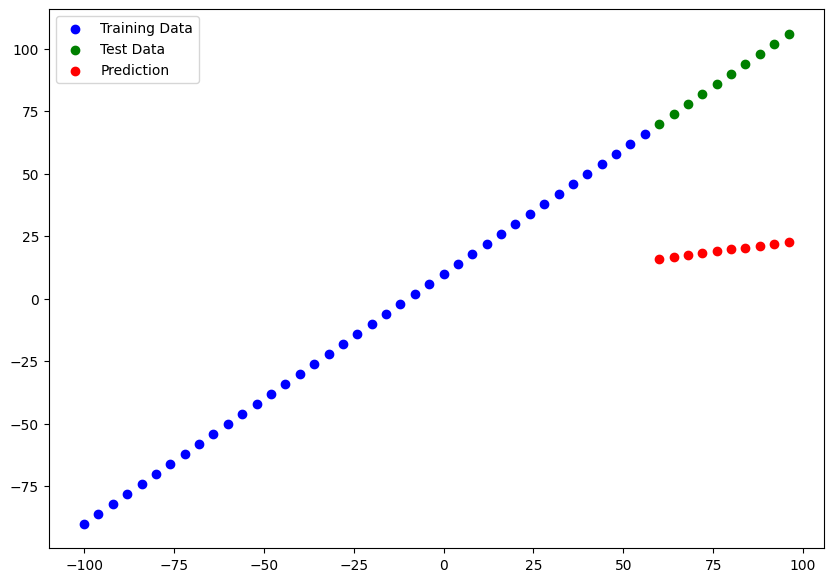

In [41]:
Y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=Y_preds_3)

In [42]:
# Calculate model 3 evaluation metrics
mae_3 = mae(Y_test, Y_preds_3)
mse_3 = mse(Y_test, Y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.64977>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4799.38>)

In [43]:
# Calculate model 3 training evaluation metrics
Y_preds_3_train = model_3.predict(X_train)

2/2 [==============================] - 0s 4ms/step


In [44]:
mae_3_train = mae(Y_train, Y_preds_3_train)
mse_3_train = mse(Y_train, Y_preds_3_train)
mae_3_train, mse_3_train

(<tf.Tensor: shape=(), dtype=float32, numpy=33.56968>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1550.8904>)

## Comparing the results

In [45]:
model_results = [['model_1', mae_1.numpy(), mse_1.numpy()],
                ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ['model_3', mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])

In [46]:
all_results

,model,mae,mse
0,model_1,32.679874,1080.448242
1,model_2,11.326427,136.668015
2,model_3,68.649773,4799.379883


**Model 2 performed better**

In [47]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Tracking experiments
Tools to help:
- TensorBoard:  Library to help track experiments.
- Weights & Biases: Tool for tracking all kinds of ML experiments. (Plugs into TensorBoard)

## Saving our models

Two formats:
- The SavedModel format.
- The HDF5 format.

In [48]:
# Saving using SavedModel
model_2.save('best_model_SavedModel_format')

In [49]:
# Saving HDF5 (better for other cases outside the notebook)
model_2.save('best_model_HDF5_format.h5')

## Load saved models

In [50]:
# SavedModel
load_SavedModel_format = tf.keras.models.load_model('best_model_SavedModel_format')
load_SavedModel_format.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [51]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [52]:
# Compare model_2 predictions with loaded model
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = load_SavedModel_format.predict(X_test)

1/1 [==============================] - 0s 153ms/step


In [53]:
model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [54]:
# Loading the HDF5 format
loaded_h5_format = tf.keras.models.load_model('best_model_HDF5_format.h5')

In [55]:
loaded_h5_format.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [56]:
loaded_h5_format_preds = loaded_h5_format.predict(X_test)

1/1 [==============================] - 0s 136ms/step


In [57]:
loaded_h5_format_preds == model_2_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## A larger example

In [58]:
# Read the insurance dataset
insurance = pd.read_csv('datasets/insurance.csv')

In [59]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [60]:
insurance.shape

(1338, 7)

**Function get_dummies in pandas for one hot encoding** 

In [61]:
insurance_one_hot = pd.get_dummies(insurance)

In [62]:
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [63]:
X = insurance_one_hot.drop(columns=['charges'], axis=1)
Y = insurance_one_hot['charges']

In [64]:
# Train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X.shape, X_train.shape, X_test.shape

((1338, 11), (1070, 11), (268, 11))

In [65]:
# Build a model similar to model_2
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [66]:
tf.random.set_seed(42)

# Create the model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae, 
                        optimizer=tf.keras.optimizers.SGD(),
                       metrics=['mae'])

# Fit the model
insurance_model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 8642.4814 - mae: 8642.4814
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7873.8345 - mae: 7873.8345
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 7599.9399 - mae: 7599.9399
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 7724.4741 - mae: 7724.4741
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 7693.6841 - mae: 7693.6841
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 7622.1353 - mae: 7622.1353
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 7586.6572 - mae: 7586.6572
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7762.5229 - mae: 7762.5229
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7490.5874 - mae: 7490.5874
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 7703.6392 - mae: 7703.6392

34/34 [==============================] - 0s 3ms/step - loss: 7141.0537 - mae: 7141.0537
Epoch 83/100
34/34 [==============================] - 0s 4ms/step - loss: 7469.8789 - mae: 7469.8789
Epoch 84/100
34/34 [==============================] - 0s 4ms/step - loss: 7375.2095 - mae: 7375.2095
Epoch 85/100
34/34 [==============================] - 0s 4ms/step - loss: 7534.8711 - mae: 7534.8711
Epoch 86/100
34/34 [==============================] - 0s 5ms/step - loss: 7428.4512 - mae: 7428.4512
Epoch 87/100
34/34 [==============================] - 0s 5ms/step - loss: 7137.5283 - mae: 7137.5283
Epoch 88/100
34/34 [==============================] - 0s 4ms/step - loss: 7331.9443 - mae: 7331.9443
Epoch 89/100
34/34 [==============================] - 0s 4ms/step - loss: 7455.9941 - mae: 7455.9941
Epoch 90/100
34/34 [==============================] - 0s 4ms/step - loss: 6995.3457 - mae: 6995.3457
Epoch 91/100
34/34 [==============================] - 0s 4ms/step - loss: 7230.1157 - mae: 7230.1157
Epo

In [67]:
# Check the results on test data
insurance_model.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 4ms/step - loss: 7724.0200 - mae: 7724.0200


[7724.02001953125, 7724.02001953125]

In [68]:
Y_train.median(), Y_train.mean()

(9575.4421, 13346.089736364485)

**The model isn't performing well, a mae of ~7000 is very significant when looking at the mean and median of the target variable.**

## Improving the model

We will try 2 experiments. 
- Add an extra layer and Adam optimizer
- Train for longer

In [69]:
# First experiment
tf.random.set_seed(42)

# Create the model
insurance_model_test_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_test_1.compile(loss=tf.keras.losses.mae, 
                        optimizer=tf.keras.optimizers.Adam(),
                       metrics=['mae'])

# Fit the model
insurance_model_test_1.fit(X_train, Y_train, epochs=100, verbose=0)

In [70]:
# Check the results on test data
insurance_model_test_1.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 4ms/step - loss: 4994.5488 - mae: 4994.5488


[4994.548828125, 4994.548828125]

In [71]:
# Second experiment
tf.random.set_seed(42)

# Create the model
insurance_model_test_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_test_2.compile(loss=tf.keras.losses.mae, 
                        optimizer=tf.keras.optimizers.Adam(),
                       metrics=['mae'])

# Fit the model and save history
history_model_test_2 = insurance_model_test_2.fit(X_train, Y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 2s 4ms/step - loss: 13303.5107 - mae: 13303.5107
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 13142.8906 - mae: 13142.8906
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 12814.8564 - mae: 12814.8564
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 12165.3418 - mae: 12165.3418
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 11060.4502 - mae: 11060.4502
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 9619.4297 - mae: 9619.4297
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 8266.9023 - mae: 8266.9023
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7576.5918 - mae: 7576.5918
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 7454.7290 - mae: 7454.7290
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 7432.8110 - mae:

34/34 [==============================] - 0s 3ms/step - loss: 5764.8154 - mae: 5764.8154
Epoch 83/200
34/34 [==============================] - 0s 4ms/step - loss: 5734.3115 - mae: 5734.3115
Epoch 84/200
34/34 [==============================] - 0s 4ms/step - loss: 5697.1436 - mae: 5697.1436
Epoch 85/200
34/34 [==============================] - 0s 4ms/step - loss: 5667.0591 - mae: 5667.0591
Epoch 86/200
34/34 [==============================] - 0s 4ms/step - loss: 5629.8262 - mae: 5629.8262
Epoch 87/200
34/34 [==============================] - 0s 3ms/step - loss: 5588.5513 - mae: 5588.5513
Epoch 88/200
34/34 [==============================] - 0s 4ms/step - loss: 5549.1919 - mae: 5549.1919
Epoch 89/200
34/34 [==============================] - 0s 4ms/step - loss: 5505.1909 - mae: 5505.1909
Epoch 90/200
34/34 [==============================] - 0s 4ms/step - loss: 5458.6270 - mae: 5458.6270
Epoch 91/200
34/34 [==============================] - 0s 4ms/step - loss: 5415.8950 - mae: 5415.8950
Epo

34/34 [==============================] - 0s 4ms/step - loss: 3720.3176 - mae: 3720.3176
Epoch 163/200
34/34 [==============================] - 0s 4ms/step - loss: 3718.0383 - mae: 3718.0383
Epoch 164/200
34/34 [==============================] - 0s 4ms/step - loss: 3722.7388 - mae: 3722.7388
Epoch 165/200
34/34 [==============================] - 0s 4ms/step - loss: 3711.9460 - mae: 3711.9460
Epoch 166/200
34/34 [==============================] - 0s 4ms/step - loss: 3717.2695 - mae: 3717.2695
Epoch 167/200
34/34 [==============================] - 0s 4ms/step - loss: 3715.9644 - mae: 3715.9644
Epoch 168/200
34/34 [==============================] - 0s 4ms/step - loss: 3710.8242 - mae: 3710.8242
Epoch 169/200
34/34 [==============================] - 0s 4ms/step - loss: 3708.1572 - mae: 3708.1572
Epoch 170/200
34/34 [==============================] - 0s 4ms/step - loss: 3704.0532 - mae: 3704.0532
Epoch 171/200
34/34 [==============================] - 0s 4ms/step - loss: 3703.6658 - mae: 3703

In [72]:
# Check the results on test data
insurance_model_test_2.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3484.3960 - mae: 3484.3960


[3484.39599609375, 3484.39599609375]

Text(0.5, 0, 'epochs')

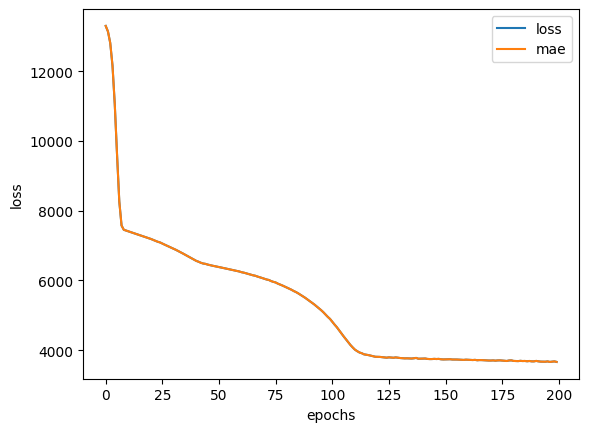

In [73]:
# Plot history, also known as loss curve or training curve
pd.DataFrame(history_model_test_2.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')


    🤔 Question: How long should you train for?

    It depends on what problem you're working on. Sometimes training won't take very long, other times it'll take longer than you expect. A common method is to set your model training for a very long time (e.g. 1000's of epochs) but set it up with an EarlyStopping callback so it stops automatically when it stops improving. We'll see this in another module.


## Preprocessing data

<Axes: ylabel='Frequency'>

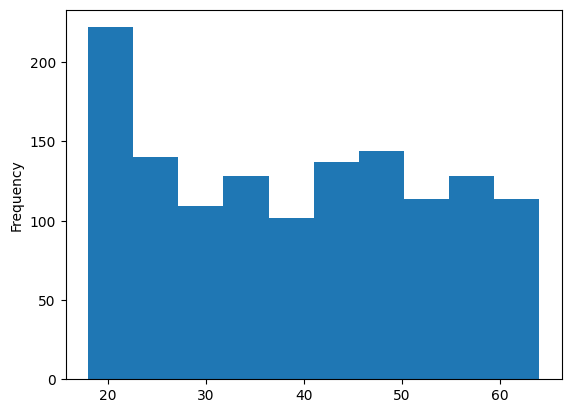

In [75]:
X['age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

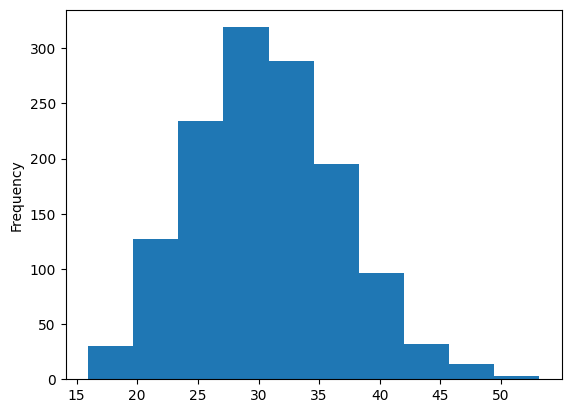

In [76]:
X['bmi'].plot(kind='hist')

In [101]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [98]:
insurance = pd.read_csv('datasets/insurance.csv')

In [99]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [104]:
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

# Create X and Y
X = insurance.drop('charges', axis=1)
Y = insurance['charges']

# Build train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit the column transformer to train data
ct.fit(X_train)

# Transform train and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [107]:
# What does our data look like
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [108]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

**The data is normalized and One Hot Encoded, now it's ready for a Neural Network**

In [109]:
tf.random.set_seed(42)

In [116]:
# Comparing with insurance_model_test_1
insurance_model_test_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 100)               1200      
                                                                 
 dense_12 (Dense)            (None, 10)                1010      
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [117]:
# Create model
insurance_model_test_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])
# Compile model
insurance_model_test_4.compile(loss=tf.keras.losses.mae,
                              optimizer=tf.keras.optimizers.Adam(),
                              metrics=['mae'])
# Fit model
insurance_model_test_4.fit(X_train_normal, Y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 3ms/step - loss: 13343.9141 - mae: 13343.9141
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 13336.1865 - mae: 13336.1865
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 13316.4414 - mae: 13316.4414
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 13274.2305 - mae: 13274.2305
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 13198.4150 - mae: 13198.4150
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 13078.1768 - mae: 13078.1768
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 12903.3076 - mae: 12903.3076
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 12663.6885 - mae: 12663.6885
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 12349.0732 - mae: 12349.0732
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 11954.09

34/34 [==============================] - 0s 4ms/step - loss: 3683.1707 - mae: 3683.1707
Epoch 82/100
34/34 [==============================] - 0s 4ms/step - loss: 3678.1179 - mae: 3678.1179
Epoch 83/100
34/34 [==============================] - 0s 4ms/step - loss: 3670.5469 - mae: 3670.5469
Epoch 84/100
34/34 [==============================] - 0s 4ms/step - loss: 3666.7693 - mae: 3666.7693
Epoch 85/100
34/34 [==============================] - 0s 3ms/step - loss: 3664.3564 - mae: 3664.3564
Epoch 86/100
34/34 [==============================] - 0s 4ms/step - loss: 3661.4988 - mae: 3661.4988
Epoch 87/100
34/34 [==============================] - 0s 4ms/step - loss: 3658.4985 - mae: 3658.4985
Epoch 88/100
34/34 [==============================] - 0s 3ms/step - loss: 3655.7014 - mae: 3655.7014
Epoch 89/100
34/34 [==============================] - 0s 3ms/step - loss: 3653.7781 - mae: 3653.7781
Epoch 90/100
34/34 [==============================] - 0s 3ms/step - loss: 3652.3110 - mae: 3652.3110
Epo

In [118]:
insurance_model_test_4.evaluate(X_test_normal, Y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3439.6335 - mae: 3439.6335


[3439.633544921875, 3439.633544921875]

In [120]:
# Previous result:
# 9/9 [==============================] - 0s 4ms/step - loss: 4994.5488 - mae: 4994.5488

# [4994.548828125, 4994.548828125]